In [2]:
##Q-1

In [ ]:
Gradient Boosting Regression is a machine learning technique that belongs to the family of ensemble methods. It is used for regression tasks, where the goal is to predict a continuous numerical outcome. The main idea behind gradient boosting regression is to sequentially train a series of weak learners (often decision trees) and combine their predictions to create a strong predictive model.

Here's a brief overview of how Gradient Boosting Regression works:

Initialization: The algorithm starts with an initial prediction, often the mean of the target values in the training dataset.

Sequential Training of Weak Learners: A weak learner (usually a shallow decision tree) is trained on the residuals (the differences between the actual and predicted values) of the current prediction. The weak learner's task is to capture the patterns or errors not yet explained by the model.

Weighted Combination of Weak Learners: The predictions of the weak learners are combined, with each weak learner contributing to the final prediction with a certain weight. The weights are determined based on the performance of each weak learner.

Update Predictions: The model's prediction is updated by adding the weighted sum of the weak learners' predictions to the previous prediction.

Iterative Process: Steps 2-4 are repeated for a predefined number of iterations or until a stopping criterion is met. At each iteration, a new weak learner is added to the ensemble, and the weights are updated.

By sequentially correcting the errors of the previous models, Gradient Boosting Regression builds a strong predictive model that can capture complex relationships in the data. The learning process involves minimizing a loss function, and the gradient of the loss is used to determine the direction and magnitude of the updates to the model's predictions.

Popular implementations of Gradient Boosting Regression include the scikit-learn library's GradientBoostingRegressor, XGBoost, LightGBM, and CatBoost. These libraries offer efficient and optimized versions of the algorithm, along with various parameters for fine-tuning and customization.

In [ ]:
##Q-2

/tmp/ipykernel_311/4113690650.py:41: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  y_pred = np.sum(self.learning_rate * model.predict(X) for model in self.models)
/tmp/ipykernel_311/4113690650.py:41: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  y_pred = np.sum(self.learning_rate * model.predict(X) for model in self.models)
/tmp/ipykernel_311/4113690650.py:41: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  y_pred = np.sum(self.learning_rate * model.predict(X) for model in self.models)
/tmp/ipykernel_311/4113690650.py:41: DeprecationWarning: Calling np.sum(generator) is deprecated, and in t

Mean Squared Error: 2.72
R-squared: 0.93


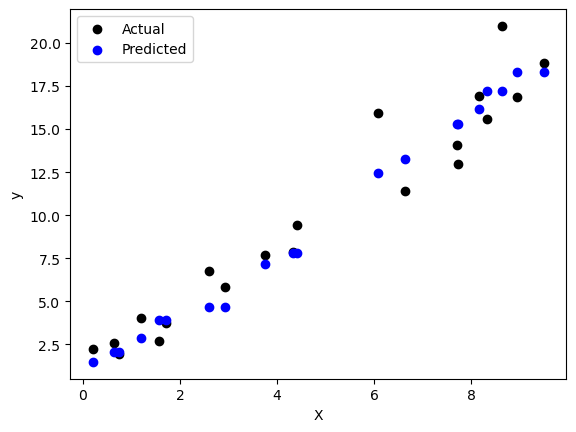

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + np.random.randn(100) * 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Gradient Boosting class
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        # Initial prediction is the mean of the target values
        base_pred = np.mean(y)
        residuals = y - base_pred

        for _ in range(self.n_estimators):
            # Fit a weak learner (Decision Tree) to the residuals
            model = DecisionTreeRegressor(max_depth=1)
            model.fit(X, residuals)

            # Update predictions with the weighted sum of weak learners
            y_pred = self.predict(X)
            residuals = y - y_pred

            # Save the weak learner
            self.models.append(model)

    def predict(self, X):
        # Combine predictions from all weak learners
        y_pred = np.sum(self.learning_rate * model.predict(X) for model in self.models)
        return y_pred

# Instantiate and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = np.array([gb_model.predict(np.array([x]).reshape(-1, 1)) for x in X_test])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the results
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
##Q-3

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + np.random.randn(100) * 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 2, 3]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a model with the best hyperparameters
best_gb_model = GradientBoostingRegressor(**best_params)
best_gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


In [ ]:
##Q-4

In [ ]:
In the context of Gradient Boosting, a weak learner is a simple model that performs slightly better than random chance on a given learning task. Typically, weak learners are models with limited complexity, such as shallow decision trees or linear models. These models are "weak" in the sense that they might have high bias or may not fit the training data well individually. However, when combined in an ensemble, they can contribute to building a strong predictive model.

In Gradient Boosting, the term "weak learner" is used because the algorithm focuses on sequentially training a series of such models to correct the errors made by the previous ones. The weakness of individual learners is compensated by the ensemble, which becomes a powerful predictor.

In [ ]:
##Q-5

In [ ]:
The intuition behind the Gradient Boosting algorithm is to sequentially improve the performance of a model by learning from its mistakes. Here's a simplified intuition:

Start with a Simple Model: Begin with a simple model that makes naive predictions, often the mean or median of the target variable.

Identify Errors: Identify the errors made by the simple model on the training data. These errors are the differences between the actual and predicted values.

Build a Model to Correct Errors: Train a new weak learner to correct the errors made by the simple model. The new model focuses on capturing the patterns in the data that the simple model failed to grasp.

Combine Predictions: Combine the predictions of the simple model and the new weak learner, giving more weight to the weak learner's predictions. This creates an improved prediction.

Iterative Process: Repeat the process, iteratively adding new weak learners to correct the errors of the combined model. Each new learner focuses on the remaining errors, gradually improving the overall model.

Create a Strong Ensemble: The final model is an ensemble of weak learners, each contributing to the prediction with a certain weight. The combination of these weak learners results in a strong and accurate model.

In [ ]:
##Q-6